# Europa geological units

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ssi import SSI
from ssi.geol import EUROPA

In [2]:
img = SSI('C0360063913R_cal.pho.cub', align=True)

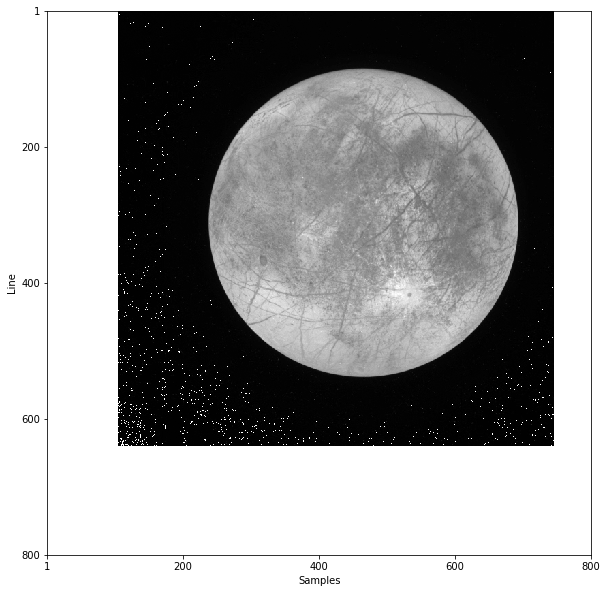

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.imshow(img.data, cmap='gray', extent=img.extent)

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks);

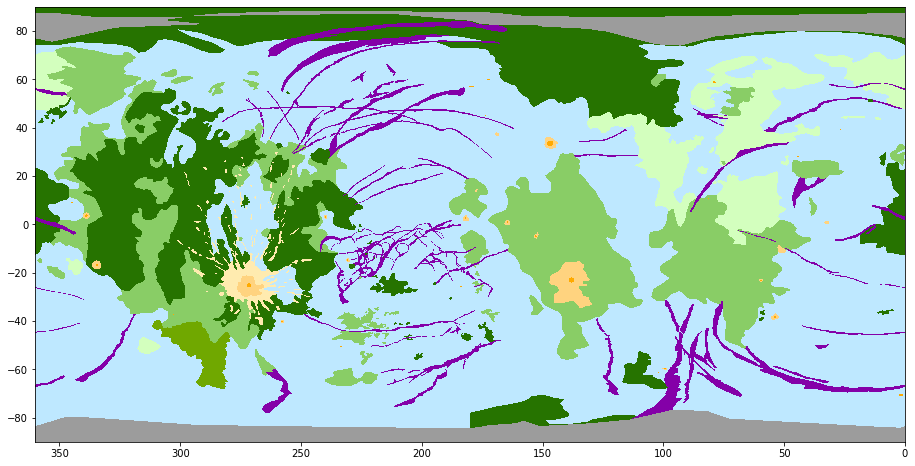

In [4]:
plt.subplots(figsize=(16, 8))

plt.imshow(EUROPA.img, cmap=EUROPA.CMAP, extent=[360, 0, -90, 90]);

In [5]:
img_geol = EUROPA(img, legend=False)

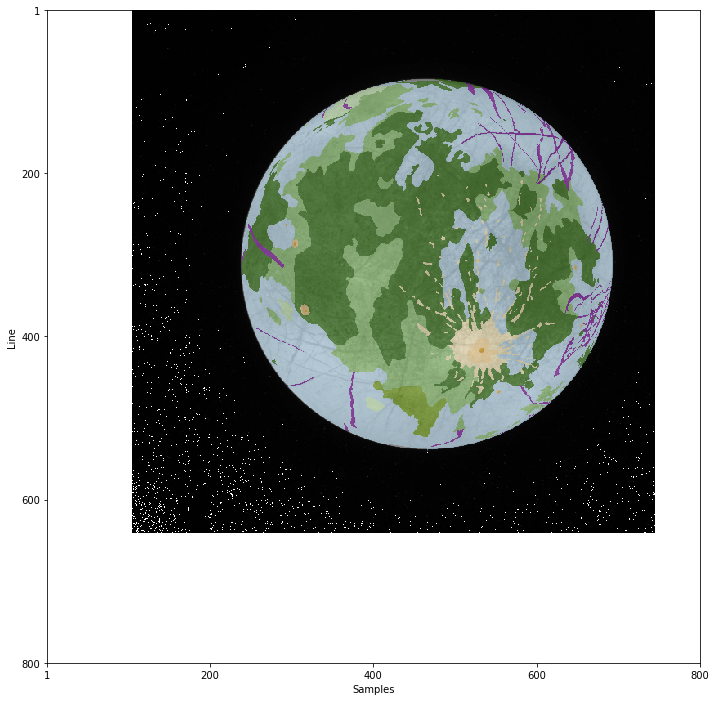

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.imshow(img.data, extent=img.extent, vmin=0, vmax=1, cmap='gray')
ax.imshow(img_geol, cmap=EUROPA.CMAP, extent=img.extent, alpha=.5)

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks);

In [7]:
units_geol = EUROPA(img)

inc_90 = np.less(img.inc, 90, where=img.ground)
emi_90 = np.less(img.emi, 90, where=img.ground)

bands = (units_geol == 'Bands') & inc_90 & emi_90
xb = np.log(img.mu0[bands] * img.mu1[bands])
yb = np.log(img.data[bands] * img.mu1[bands])

plains = (units_geol == 'Ridged plains') & inc_90 & emi_90
xp = np.log(img.mu0[plains] * img.mu1[plains])
yp = np.log(img.data[plains] * img.mu1[plains])

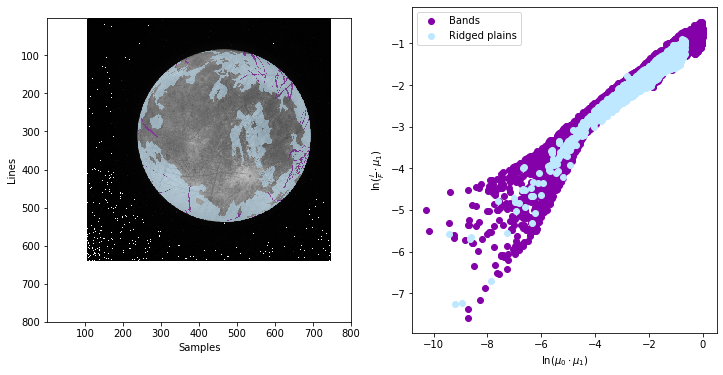

In [8]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

ax0.imshow(img.data, extent=img.extent, vmin=0, vmax=1, cmap='gray')
ax0.imshow(np.ma.array(img_geol, mask=~bands), extent=img.extent, cmap=EUROPA.CMAP, vmin=0, vmax=255, alpha=.5)
ax0.imshow(np.ma.array(img_geol, mask=~plains), extent=img.extent, cmap=EUROPA.CMAP, vmin=0, vmax=255, alpha=.5)

ax1.scatter(xp, yp, color=EUROPA.color('Bands'), label='Bands')
ax1.scatter(xb, yb, color=EUROPA.color('Ridged plains'), label='Ridged plains')
ax1.legend()

ax0.set_xlabel('Samples')
ax0.set_ylabel('Lines')

ax1.set_xlabel(r'$\ln(\mu_0 \cdot \mu_1)$')
ax1.set_ylabel(r'$\ln(\frac{I}{F} \cdot \mu_1)$');